In [69]:
from combineData import mergedMUA_df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

In [57]:
# Assign CAHPS measures to new DataFrame
grp_df=mergedMUA_df.loc[:,('state','number_of_completed_surveys','number_of_sampled_patients','patients_rating_of_the_facility_linear_mean_score','patients_who_gave_the_facility_a_rating_of_0_to_6_on_a_scale_from_0_lowest_to_10_highest','patients_who_gave_the_facility_a_rating_of_7_or_8_on_a_scale_from_0_lowest_to_10_highest','patients_who_gave_the_facility_a_rating_of_9_or_10_on_a_scale_from_0_lowest_to_10_highest','patients_who_reported_no_they_would_not_recommend_the_facility_to_family_or_friends','patients_who_reported_probably_yes_they_would_recommend_the_facility_to_family_or_friends','patients_who_reported_that_staff_definitely_communicated_about_what_to_expect_during_and_after_the_procedure','patients_who_reported_that_staff_definitely_gave_care_in_a_professional_way_and_the_facility_was_clean','patients_who_reported_that_staff_did_not_communicate_about_what_to_expect_during_and_after_the_procedure','patients_who_reported_that_staff_did_not_give_care_in_a_professional_way_or_the_facility_was_not_clean','patients_who_reported_that_staff_somewhat_communicated_about_what_to_expect_during_and_after_the_procedure','patients_who_reported_that_staff_somewhat_gave_care_in_a_professional_way_or_the_facility_was_somewhat_clean','patients_who_reported_yes_they_would_definitely_recommend_the_facility_to_family_or_friends')].groupby(by='state').sum().reset_index()

In [58]:
# Get statewide count sums
grp_df=grp_df.groupby(by='state').sum().reset_index()


def plot_resp_by_state(columns, names, graphTitle):
    """Plots the proportion of patients who gave each response to a survey question
    args:
    columns = bracketed list of column names
    names = bracketed list of column names to-be
    graphTilte = string"""

    # create dict of current and to-be column names 
    name_dict={}

    for i, col in enumerate(columns):
        name_dict[col]=names[i]
    
    # add the following two columns to column list
    col_list=['state','number_of_completed_surveys']
    col_list.extend(columns)

    # create new df from grp_df and rename columns
    df=grp_df[col_list].rename(columns=name_dict)

    # change measure from count to proportion of total surveyed patients
    l=len(col_list)
    df.iloc[:,2:l]=df.values[:,2:l]/df.values[:,1,None]

    # restructure DataFrame
    df=df.melt(id_vars='state', value_vars=names, var_name='rating', value_name='proportion of patients')

    # create plot
    fig = go.Figure(data=[go.Box(x=df['rating'], y=df['proportion of patients'], boxpoints='all', jitter=0.5, width=.3, hoverinfo='text', hovertext=comm_df['state'])])
    fig.update_layout(title_text=graphTitle, template="plotly_white")
    fig.update_xaxes(title_text="response")
    fig.update_yaxes(title_text="proportion of patients")
    fig.show()


# create a list of column lists, a list of name lists, and a list of graph ttiles for 4 measures

columns=[['patients_who_reported_that_staff_did_not_communicate_about_what_to_expect_during_and_after_the_procedure','patients_who_reported_that_staff_somewhat_communicated_about_what_to_expect_during_and_after_the_procedure', 'patients_who_reported_that_staff_definitely_communicated_about_what_to_expect_during_and_after_the_procedure'],
['patients_who_reported_no_they_would_not_recommend_the_facility_to_family_or_friends','patients_who_reported_probably_yes_they_would_recommend_the_facility_to_family_or_friends','patients_who_reported_yes_they_would_definitely_recommend_the_facility_to_family_or_friends'],
['patients_who_reported_that_staff_did_not_give_care_in_a_professional_way_or_the_facility_was_not_clean','patients_who_reported_that_staff_somewhat_gave_care_in_a_professional_way_or_the_facility_was_somewhat_clean','patients_who_reported_that_staff_definitely_gave_care_in_a_professional_way_and_the_facility_was_clean'],
['patients_who_gave_the_facility_a_rating_of_0_to_6_on_a_scale_from_0_lowest_to_10_highest','patients_who_gave_the_facility_a_rating_of_7_or_8_on_a_scale_from_0_lowest_to_10_highest','patients_who_gave_the_facility_a_rating_of_9_or_10_on_a_scale_from_0_lowest_to_10_highest']]
names_list=[['not at all', 'somewhat', 'definitely'],
['no','probably', 'yes definitely'],
['not at all', 'somewhat', 'definitely'],
['0-6','7-8','9-10']]
graphTitle_list=["Patient Ratings of Staff Communication about the Procedure", "Patient Ratings of If They Would Recommend the Facility", "Patient Ratings of Professional Care and Facility Cleanliness","Overall Rating of the Facility (scale from 0 lowest to 10 highest)"]


# plot each of 4 measures

for i, o in enumerate(columns):
    columns=o
    names=names_list[i]
    graphTitle=graphTitle_list[i]
    plot_resp_by_state(columns, names, graphTitle)


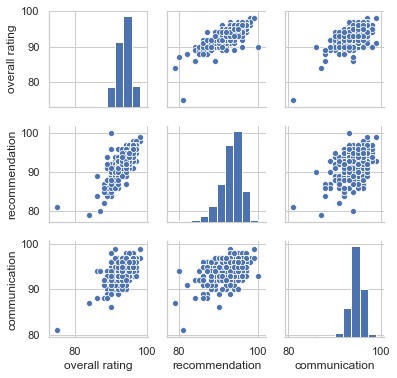

In [65]:
plt_df = mergedMUA_df
d = sns.pairplot(plt_df, height = 2, vars=['patients_rating_of_the_facility_linear_mean_score', 'patients_recommending_the_facility_linear_mean_score', 'communication_about_your_procedure_linear_mean_score'], )
replacements = {'communication_about_your_procedure_linear_mean_score': 'communication', 'patients_recommending_the_facility_linear_mean_score': 'recommendation', 'patients_rating_of_the_facility_linear_mean_score': 'overall rating'}
for i in range(3):
    for j in range(3):
        xlabel = d.axes[i][j].get_xlabel()
        ylabel = d.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            d.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            d.axes[i][j].set_ylabel(replacements[ylabel])

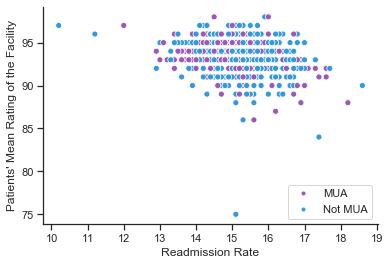

In [70]:
sns.set_style('white')
sns.set_style('ticks')
a = sns.scatterplot(data = plt_df, x = "rate_of_readmission", y = "patients_rating_of_the_facility_linear_mean_score", hue = "is-MUA?",  palette=["#9b59b6", "#3498db"])
sns.despine()
a.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel("Readmission Rate")
plt.ylabel("Patients' Mean Rating of the Facility")
custom = [Line2D([], [], marker='.', color="#9b59b6", linestyle='None'),Line2D([], [], marker='.', color="#3498db", linestyle='None')]
plt.legend(custom, ['MUA', 'Not MUA'], loc='lower right')


In [166]:
plt_df = mergedMUA_df
trace1=go.Scattergl(x=plt_df[plt_df['is-MUA?'=='Yes']].rate_of_readmission, y = plt_df[plt_df['is-MUA?'=='Yes']].patients_rating_of_the_facility_linear_mean_score, mode='markers', hoverinfo="text", hovertext=plt_df.facility_name  + plt_df.address )
fig = go.Figure(data=[go.Scattergl(x = plt_df['rate_of_readmission'], y = plt_df['patients_rating_of_the_facility_linear_mean_score'], mode='markers', hoverinfo="text", hovertext=[plt_df.facility_name + ',' + plt_df.address])])
fig.update_layout(template="plotly_white")
fig.update_xaxes(title_text="Readmission Rate")
fig.update_yaxes(title_text="Patients' Mean Rating of the Facility")
fig.show()


KeyError: False

In [163]:
plt_df = mergedMUA_df
fig = go.Figure(data=[
    go.Scattergl(
        x = plt_df['rate_of_readmission'], 
        y = plt_df['patients_rating_of_the_facility_linear_mean_score'], 
        mode='markers', 
        hoverinfo="text", 
        hovertext=[ '{plt_df.at[i, "facility_name"]} <br> {plt_df.at[i, "address"]}<br>{plt_df.at[i, "city"]}' for i in range(len(plt_df))],
        name = 'Hi')])
fig.update_layout(template="plotly_white")
fig.update_xaxes(title_text="Readmission Rate")
fig.update_yaxes(title_text="Patients' Mean Rating of the Facility")
fig.show()


In [ ]:
data=[]
for level in plt_df['is-MUA?'].unique():
    trace=plt_df[plt_df['is-MUA?'] == level]
    data.append(
        go.Scatter(
            x = trace.rate_of_readmission,
            y = trace.patients_rating_of_the_facility_linear_mean_score,
            mode = 'markers',
            name = str(level)
            

In [138]:
fig = px.scatter(plt_df, x="rate_of_readmission", y="patients_rating_of_the_facility_linear_mean_score", color="is-MUA?", hover_data=["facility_name", "address", "city", "state"])
fig.update_layout(template="plotly_white")
fig.update_xaxes(title_text="Readmission Rate")
fig.update_yaxes(title_text="Patients' Mean Rating of the Facility")
fig.show()